### ADS - Homework_3_Solutions
### Achilles E A Saxby
### aes807

### Q1 (5 points). P-values and hypothesis testing
Suppose that a multiple regression with 7 regressors gave the following p-values for each of them:
0.02, 0.1, 3e-15, 0.04, 0.001, 0.06, 0.03
For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

## Solution - Q1

#### Here, the regression coefficient is Zero(0)
#### Null Hypothesis : $H_0:w_j=w_j^0$
#### We choose the statistical significance of $\alpha$ < 5% or $\alpha$ < 0.05
#### According to this statistical significance, the Null Hypothesis is rejected for any $\alpha$ value that is < 0.05
#### According to this statistical significance, the Null Hypothesis cannot be rejected/failed to reject for any $\alpha$ value that is > 0.05

#### Hence, the solution here is that we reject the values < 0.05 $\Rightarrow$ (0.02) | (3e-15) | (0.04) | (0.001) | (0.03)
#### Hence, the solution here is that we fail to reject the values > 0.05 $\Rightarrow$ (0.1) | (0.06)

### Q2 (5 points). Confidence intervals
Assume we perform a regression and get an estimate 10 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 95%-confidence interval is [-5, 5]

b. 99%-conficence interval is [9.99,10.01]

c. 95%-confidence interval is [9,100]

c. 99%-confidence interval is [8, 12], while 95%-confidence interval is [9, 11].

Explain your choices

## Solution - Q2

#### Since the estimate is 10 and the confidence intervals are chosen to be either 99% (0.01) or 95% (0.05)
#### The solution here is to check and see if the confidence intervals have the value in the midst of them.

#### Using this we can see that 95% C.I. for [-5,5] does not have the value in the midst $\Rightarrow$ the statement is not true.
#### Using this we can see that 95% C.I. for [9,100] has the value in the midst $\Rightarrow$ the statement could be true - but we can also notice here that the symmetry for the C.I. is not true - if the confidence interval for [9,100] we may be able to say that the distribution is highly positively skewed which can be a right statement but then the choice does not make much sense. Also, when calculating the 95% C.I. the value of 100 does not fit into the equation properly - this shows a really high interval - which is not possible if the other value is 9

#### Solution options are:
    - a. 95%-confidence interval is [-5,5]
    - c1. 95%-confidence interval is [9,100]

In [27]:
#Loading all the imports in the start of the program itself !!

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Q3.(Car Price Example, 20pts)
You are given a dataset containing the information regarding car prices:
'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls'  

**VARIABLE DESCRIPTIONS:** (Data was collected in 2005)
* Price: suggested retail price of the used 2005 GM car in excellent condition. The condition of a car can greatly affect price. All cars in this data set were less than one year old when priced and considered to be in excellent condition. 
* Mileage: number of miles the car has been driven
* Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
* Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
* Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
* Type: body type such as sedan, coupe, etc.
* Cylinder: number of cylinders in the engine	
* Liter: a more specific measure of engine size	
* Doors: number of doors	
* Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
* Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
* Leather: indicator variable representing whether the car has leather seats (1 = leather)
  
Run the regression modeling the price through all the features above except 'Model","Trim" and "Type" and analyse its statistics. Based on the results suppose there's a price X you have to pay for each additional Liter of your tank capacity, then:
* (a) What's the expected price E(X)?  
* (b) What's the probability that X > \$4500?  
* (c) What's the two-sided 90% confidence interval of X?
* (d) What's the one-sided 90% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$
   

In [28]:
car_data = pd.read_excel('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls')
car_data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [29]:
car_model = smf.ols(formula = 'Price ~ Mileage + Make + Cylinder + Liter + Doors + Cruise + Sound + Leather', data = car_data).fit()
car_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     479.0
Date:                Mon, 24 Oct 2016   Prob (F-statistic):               0.00
Time:                        05:02:43   Log-Likelihood:                -7687.0
No. Observations:                 804   AIC:                         1.540e+04
Df Residuals:                     791   BIC:                         1.546e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          1.572e+04   1289.586     12.187      0.000      1.32e+04  1.82e+04
Make[T.Cadillac]   1.627e+04    662.429     24.564      0.000       1.5e+04  1.76e+04
Make[T.Chevrolet] -2237.3396    483.939     -4.623      0.000     -3187.297 -1287.382
Make[T.Pontiac]   -1779.0181    496.544     -3.583      0.000     -2753.718  -804.318
Make[T.SAAB]       1.464e+04    589.595     24.830      0.000      1.35e+04  1.58e+04
Make[T.Saturn]    -2311.6230    655.461     -3.527      0.000     -3598.271 -1024.975
Mileage              -0.1804      0.015    -12.050      0.000        -0.210    -0.151
Cylinder           -215.0175    404.027     -0.532      0.595     -1008.110   578.075
Liter              4760.4180    459.970     10.349      0.000      3857.513  5663.324
Doors             -1710.0569    155.249    -11.015      0.000     -2014.805 -1405.309
Cruise             -503.8479    346.723     -1.453      0.147     -1184.454   176.758
Sound               -44.0784    277.268     -0.159      0.874      -588.348   500.191
Leather              25.4588    299.765      0.085      0.932      -562.971   613.888
==============================================================================
Omnibus:                      402.163   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4473.412
Skew:                           1.991   Prob(JB):                         0.00
Kurtosis:                      13.848   Cond. No.                     2.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### (a) What's the expected price E(X)?  

In [30]:
car_model.params.Liter

4760.4180231871751

#### (b) What's the probability that X > \$4500? 

In [31]:
t.sf((4500 - car_model.params['Liter'])/car_model.bse['Liter'], car_model.df_resid)

0.71427839234184343

#### (c) What's the two-sided 90% confidence interval of X?

In [32]:
car_model.conf_int(alpha=0.1).loc['Liter']

0    4002.948181
1    5517.887866
Name: Liter, dtype: float64

#### (d) What's the one-sided 90% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$

In [36]:
one_side = (1-0.9)   
upper_interval = t.isf(one_side, car_model.df_resid) * car_model.bse['Liter'] + car_model.params['Liter']
print'%f'%(upper_interval)

5350.385539


### Q4. Dimension reduction using PCA.  (40 pts)

Let's see the handwriting digits data set. This data set includes 1787 digits. And for each digit, we have 64 binary variables x1,x2,...x64, each one representing a pixel on the 8x8 image (1-belongs to an image, 0-blank). The label (y) for each digit image is the actual digit it represents from 0 to 9.  

In [42]:
#Run the following code.

digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


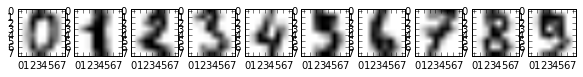

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Let's start our questions. 

#### Part one. We have 64-dimension feature space(exclude y) X.  (5pts+5pts)
a. Assume we need to use PCA to transform X to Xproj.Plot the explained variance for each eigenvector(direction) from high to low in one scatter plot. 

b. What is the total variance of X? How many eigenvectors(directions) do we need to choose if we want to preserve 90% variance of the original data.

#### Part two. Let's use PCA to reduce the dimensionality of digits data set from 64 to 3. And then  visulize the transformed space on a 3 dimensional plot. Please color the points with respect to their label y. (10 pts)

#### Part three. Take the data for digits 3 and 8 from the origional data set and call it data1. (20pts)
a. If we use PCA for dimensionality reduction on data1, how big is the percentage of total variance, that the first and second eigenvectors could explain? 

b. Now let's visulize the dimensional feature space of data1 by the first two eigenvectors. Color your points according to the digits they represent.

c. Visulize the feature space using third and fourth eigenvectors(directions).

d. Visulize the feature space using the last two eigenvectors(directions).


## Solutions - Q4

### Part One. 
#### We have 64-dimension feature space(exclude y) X.  (5pts+5pts)

#### a. Assume we need to use PCA to transform X to Xproj.Plot the explained variance for each eigenvector(direction) from high to low in one scatter plot. 

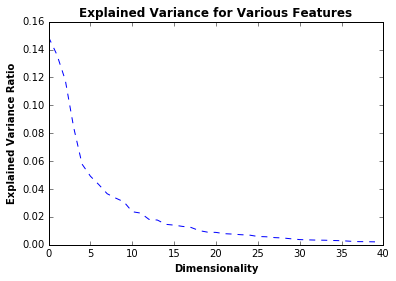

In [47]:
n=40 
# How many eigenvectors we choose at the start

pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_

plt.plot(np.arange(n), eigenvalues, '--')
plt.xlabel("Dimensionality", fontweight = 'bold')
plt.ylabel("Explained Variance Ratio", fontweight = 'bold')
plt.title('Explained Variance for Various Features', fontsize = 12, fontweight = 'bold')
plt.show()

#### b. What is the total variance of X? How many eigenvectors(directions) do we need to choose if we want to preserve 90% variance of the original data.

In [48]:
print('Total variance of X is %s'%np.var(X))

Total variance of X is 36.2017324059


In [52]:
pca = PCA(0.90)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_
eigenvectors = pca.explained_variance_
n = pca.n_components_

print 'We need {} eigenvectors or directions to preserve 90% variance of the original data'.format(n)
print 'The %age of Variance with {} eigenvectors is:'.format(n), (sum(eigenvalues))*100

We need 21 eigenvectors or directions to preserve 90% variance of the original data
The %age of Variance with 21 eigenvectors is: 90.3198501204


### Part Two. 
#### Let's use PCA to reduce the dimensionality of digits data set from 64 to 3. And then  visulize the transformed space on a 3 dimensional plot. Please color the points with respect to their label y. (10 pts)

In [53]:
# This is how many eigenvectors we choose right now
n = 3
pca = PCA(n)
Xproj = pca.fit_transform(X)

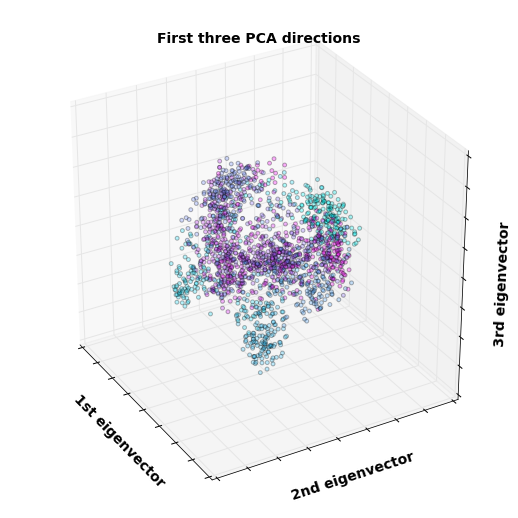

In [14]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, elev=-150, azim=30)
ax.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=y, cmap=plt.cm.cool, alpha = 0.3, s = 15,)
ax.set_title("First three PCA directions", fontsize = 14, fontweight = 'bold')
ax.set_xlabel("1st eigenvector", fontsize = 14, fontweight = 'bold')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector", fontsize = 14, fontweight = 'bold')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector", fontsize = 14, fontweight = 'bold')
ax.w_zaxis.set_ticklabels([])

plt.show()

### Part Three. 
#### Take the data for digits 3 and 8 from the origional data set and call it data1. (20pts)
a. If we use PCA for dimensionality reduction on data1, how big is the percentage of total variance, that the first and second eigenvectors could explain? 

b. Now let's visulize the dimensional feature space of data1 by the first two eigenvectors. Color your points according to the digits they represent.

c. Visulize the feature space using third and fourth eigenvectors(directions).

d. Visulize the feature space using the last two eigenvectors(directions).

In [54]:
data_1 = []
for i in range(len(data)):
    if (data.y[i] == 3 or data.y[i] == 8):
        data_1.append(data.iloc[i,:])
data_1 = pd.DataFrame(data_1)
data_1.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
8,8.0,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
13,3.0,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,...,6.0,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0
18,8.0,0.0,0.0,10.0,7.0,13.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,5.0,0.0,0.0,0.0
23,3.0,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0


In [55]:
y = data_1.y
x = data_1.iloc[:,1:]

#### a. If we use PCA for dimensionality reduction on data1, how big is the percentage of total variance, that the first and second eigenvectors could explain?

In [56]:
pca = PCA(25)
Xproj = pca.fit_transform(x)
eigenvalues = pca.explained_variance_ratio_
print("The Total Variance explained by eigen_values 1 and 2 is {}%".format((eigenvalues[0] + eigenvalues[1])*100))

The Total Variance explained by eigen_values 1 and 2 is 36.2281784395%


#### b. Now let's visulize the dimensional feature space of data1 by the first two eigenvectors. Color your points according to the digits they represent.

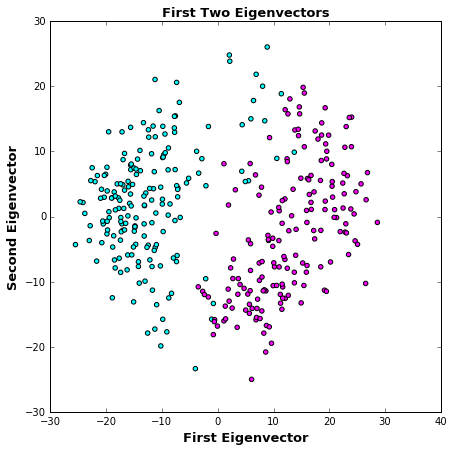

In [61]:
plt.figure(2, figsize=(7, 7))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c = y, cmap=plt.cm.cool)
plt.xlabel("First Eigenvector", fontsize = 13, fontweight = 'bold')
plt.ylabel("Second Eigenvector", fontsize = 13, fontweight = 'bold')
plt.title("First Two Eigenvectors", fontsize = 13, fontweight = 'bold')
plt.show()

#### c. Visulize the feature space using third and fourth eigenvectors(directions).

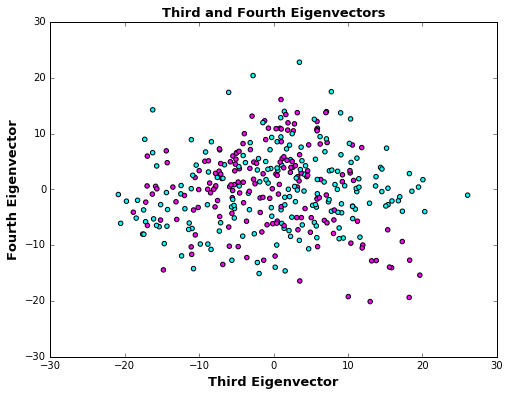

In [60]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 2], Xproj[:, 3], c = y , cmap=plt.cm.cool)
plt.xlabel("Third Eigenvector", fontsize = 13, fontweight = 'bold')
plt.ylabel("Fourth Eigenvector", fontsize = 13, fontweight = 'bold')
plt.title("Third and Fourth Eigenvectors", fontsize = 13, fontweight = 'bold')
plt.show()

#### d. Visulize the feature space using the last two eigenvectors(directions).

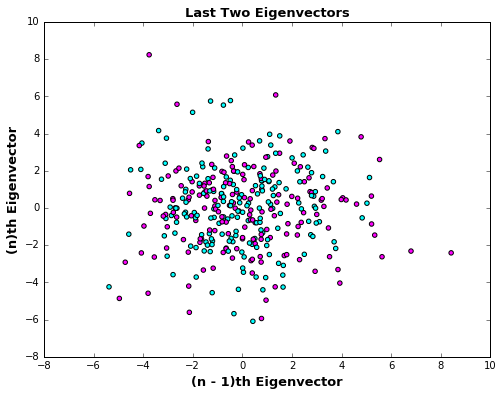

In [59]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 23], Xproj[:, 24], c = y, cmap=plt.cm.cool)
plt.xlabel("(n - 1)th Eigenvector", fontsize = 13, fontweight = 'bold')
plt.ylabel("(n)th Eigenvector", fontsize = 13, fontweight = 'bold')
plt.title("Last Two Eigenvectors", fontsize = 13, fontweight = 'bold')
plt.show()

##### Q5. (30 pts)

In [63]:
data=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474//ADS_Data/session06/data_hw_3_4.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


In [71]:
x=data.iloc[:,1:]
y=np.asarray(data.Y)

#### A. Run a linear regression : Y~x1+..+x15 (without constant) and report the summary of this regression result. (5pts)

In [73]:
ols=LinearRegression(fit_intercept=False)
ols.fit(x,y)
print ols.coef_

[  3.30258760e+00  -4.86088640e+00  -4.06746944e+00   3.28908333e+00
   4.60963667e+00  -2.63044140e-03  -3.57527486e-02  -1.49487580e-01
   5.63942595e-02  -1.86047791e-02  -3.10677586e-02   5.53492856e-02
  -6.76472912e-02  -9.38515166e-02   2.64579849e-02]


In [77]:
res=sm.OLS(data.loc[:,'Y'], data.iloc[:,1:]).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     7.682
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           3.73e-07
Time:                        05:14:21   Log-Likelihood:                -64.562
No. Observations:                  50   AIC:                             159.1
Df Residuals:                      35   BIC:                             187.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3026      1.692      1.951      0.059        -0.133     6.738
x2            -4.8609      2.527     -1.923      0.063        -9.992     0.270
x3            -4.0675      2.081     -1.955      0.059        -8.291     0.156
x4             3.2891      1.689      1.948      0.060        -0.139     6.718
x5             4.6096      2.413      1.910      0.064        -0.290     9.509
x6            -0.0026      0.026     -0.102      0.920        -0.055     0.050
x7            -0.0358      0.028     -1.263      0.215        -0.093     0.022
x8            -0.1495      0.037     -4.070      0.000        -0.224    -0.075
x9             0.0564      0.038      1.490      0.145        -0.020     0.133
x10           -0.0186      0.035     -0.534      0.597        -0.089     0.052
x11           -0.0311      0.030     -1.023      0.313        -0.093     0.031
x12            0.0553      0.032      1.708      0.097        -0.010     0.121
x13           -0.0676      0.032     -2.086      0.044        -0.133    -0.002
x14           -0.0939      0.035     -2.702      0.011        -0.164    -0.023
x15            0.0265      0.035      0.759      0.453        -0.044     0.097
==============================================================================
Omnibus:                        1.488   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                0.806
Skew:                          -0.278   Prob(JB):                        0.668
Kurtosis:                       3.280   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### B. Demonstrate the overfitting problem by 1000 times cross-validation.  Report average OS and IS R-squared.  (10 pts)

In [78]:
R_IS = []
R_OS = []

n = 1000

for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)
    
    res = LinearRegression(fit_intercept = False)
    res.fit(X_train, y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())

print "IS R_Squared for {} times is {}".format(n,np.mean(R_IS))
print "OS R_Squared for {} times is {}".format(n,np.mean(R_OS))

IS R_Squared for 1000 times is 0.804890181443
OS R_Squared for 1000 times is 0.282941095121


#### C. Repeat A and B on features after feature selection(p value<0.05). (5pts)

In [79]:
res = sm.OLS(y,x).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     7.682
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           3.73e-07
Time:                        05:21:16   Log-Likelihood:                -64.562
No. Observations:                  50   AIC:                             159.1
Df Residuals:                      35   BIC:                             187.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3026      1.692      1.951      0.059        -0.133     6.738
x2            -4.8609      2.527     -1.923      0.063        -9.992     0.270
x3            -4.0675      2.081     -1.955      0.059        -8.291     0.156
x4             3.2891      1.689      1.948      0.060        -0.139     6.718
x5             4.6096      2.413      1.910      0.064        -0.290     9.509
x6            -0.0026      0.026     -0.102      0.920        -0.055     0.050
x7            -0.0358      0.028     -1.263      0.215        -0.093     0.022
x8            -0.1495      0.037     -4.070      0.000        -0.224    -0.075
x9             0.0564      0.038      1.490      0.145        -0.020     0.133
x10           -0.0186      0.035     -0.534      0.597        -0.089     0.052
x11           -0.0311      0.030     -1.023      0.313        -0.093     0.031
x12            0.0553      0.032      1.708      0.097        -0.010     0.121
x13           -0.0676      0.032     -2.086      0.044        -0.133    -0.002
x14           -0.0939      0.035     -2.702      0.011        -0.164    -0.023
x15            0.0265      0.035      0.759      0.453        -0.044     0.097
==============================================================================
Omnibus:                        1.488   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                0.806
Skew:                          -0.278   Prob(JB):                        0.668
Kurtosis:                       3.280   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
res = sm.OLS(y, x.iloc[:,[8, 13, 14]]).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.308
Date:                Mon, 24 Oct 2016   Prob (F-statistic):              0.283
Time:                        05:22:19   Log-Likelihood:                -98.979
No. Observations:                  50   AIC:                             204.0
Df Residuals:                      47   BIC:                             209.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x9             0.0003      0.048      0.006      0.995        -0.096     0.097
x14           -0.0304      0.039     -0.785      0.437        -0.108     0.047
x15            0.0635      0.042      1.507      0.138        -0.021     0.148
==============================================================================
Omnibus:                        8.214   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.338
Skew:                           0.877   Prob(JB):                       0.0255
Kurtosis:                       3.670   Cond. No.                         4.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### D. Transform the data set by PCA and keep all 15 eigenvectors(directions). Call the new data set after transformation Xproj. And repeat questions A and B using Xproj. (10 pts)

In [81]:
n = 15
pca = PCA(n)
Xproj = pca.fit_transform(x)

In [82]:
res = sm.OLS(y, pd.DataFrame(Xproj)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     10.74
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           5.31e-09
Time:                        05:23:26   Log-Likelihood:                -57.896
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      35   BIC:                             174.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
0              0.0200      0.004      5.321      0.000         0.012     0.028
1              0.0469      0.006      7.941      0.000         0.035     0.059
2              0.0047      0.007      0.642      0.525        -0.010     0.020
3              0.0424      0.013      3.224      0.003         0.016     0.069
4             -0.0117      0.019     -0.618      0.541        -0.050     0.027
5             -0.0063      0.020     -0.314      0.755        -0.047     0.034
6              0.0373      0.022      1.722      0.094        -0.007     0.081
7              0.0376      0.024      1.538      0.133        -0.012     0.087
8             -0.0048      0.026     -0.188      0.852        -0.057     0.047
9             -0.0423      0.027     -1.558      0.128        -0.097     0.013
10             0.0458      0.033      1.395      0.172        -0.021     0.112
11             0.1637      0.035      4.622      0.000         0.092     0.236
12            -0.0761      0.037     -2.072      0.046        -0.151    -0.002
13            -0.0622      0.042     -1.484      0.147        -0.147     0.023
14            43.5872      9.538      4.570      0.000        24.224    62.950
==============================================================================
Omnibus:                        0.981   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.464
Skew:                          -0.217   Prob(JB):                        0.793
Kurtosis:                       3.184   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
R_IS = []
R_OS = []

n = 1000

for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(Xproj, y, test_size = 0.4)
    
    res = LinearRegression(fit_intercept = False)
    res.fit(X_train, y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())

print "IS R_Squared for {} times is {}".format(n,np.mean(R_IS))
print "OS R_Squared for {} times is {}".format(n,np.mean(R_OS))

IS R_Squared for 1000 times is 0.864605074027
OS R_Squared for 1000 times is 0.393676814871


## Extra-credit assignment 

### EC1 (20 points) "Real" out of sample test. 

Review the cross-validation process of last question carefully, you will find the cross-validation is somehow "fake". The reason is that we accessed the information of validation set when we apply PCA on the whole data set.(You should know why). Redo the cross-validation part for question D in previous question. Run 100 times "real" cross-validation and report OS and IS R-squared. 

Hint: for each loop, split the data set to train and validation set, and using PCA only on training set to find the siginificant eigenvectors(directions), and then transform the test data the same way and pick the same eigenvectors for regression.    

### EC2. When PCA could not work?  (20 points). 

Generate a 2 dimensional feature space with labels to show PCA does not work in the case you made. Plot your data set and explain your reason. This is an open question. Any data set which have two dimensional feature space with good explaination why PCA does not work should be fine.

In [99]:
np.random.seed(123)
number1 = pd.DataFrame(np.random.rand(400,1))
number2 = pd.DataFrame(np.random.normal(size=(400,1)))

In [100]:
number = pd.concat([number1,number2], axis=1)

In [101]:
number.columns = 'number1', 'number2'

In [102]:
number.corr()

,number1,number2
number1,1.000000,0.068947
number2,0.068947,1.000000


(0.0, 1.0, -3.0, 3.0)

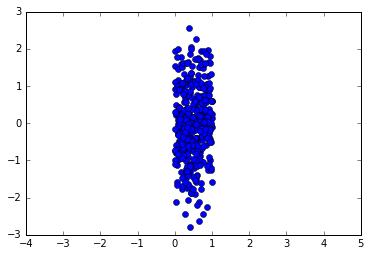

In [103]:
plt.plot(number.iloc[:,0], number.iloc[:,1], 'o')
plt.axis('equal')

In [104]:
x = number
print("Total Variance: {}".format(np.sum(np.var(number,0))))
pca = PCA(40)
pca.fit(X)
print("The Variance explained through the First and Second components: {}\n".format(pca.explained_variance_))
print("The Principal Components are: \n{}".format(pca.components_))
print pca.explained_variance_ratio_

Total Variance: 1.03541315992
The Variance explained through the First and Second components: [ 178.90731578  163.62664073  141.70953623  101.04411456   69.47448269
   59.075632     51.85566624   43.99061301   40.28856291   36.99120196
   28.50317082   27.30596604   21.88930033   21.3124899    17.62690769
   16.93743321   15.84256888   14.99611049   12.2276649    10.88080097
   10.68761546    9.57726524    9.22126826    8.68553268    8.36095658
    7.16179198    6.91588809    6.18950881    5.88171633    5.15299774
    4.48879723    4.24451468    4.0451865     3.94120891    3.70440987
    3.52968776    3.08285758    2.73627648    2.67062197    2.54029121]

The Principal Components are: 
[[ -5.55111512e-17  -1.73094651e-02  -2.23428835e-01 ...,  -8.94184677e-02
   -3.65977111e-02  -1.14684954e-02]
 [ -1.11022302e-16  -1.01064569e-02  -4.90849204e-02 ...,   1.76697117e-01
    1.94547053e-02  -6.69693895e-03]
 [  1.11022302e-16   1.83420720e-02   1.26475543e-01 ...,   2.32084163e-01
    1.

#### If PCA does not work, the features either have non-linear relationships or no relationships at all. 
##### Checking with a polynomial, radial or any other kernel based PCA only if you believe that a relationship/correlation between the features must exist. 

### EC3.(Multiple choice, 5pts. Please add short explaination)
Suppose you have two different feature selection choices A and B, and we have already separated the dataset into training set and validation set. Now we want to use "out-of-sample" $R^2$ to evaluate the model prediction power. The regular $R^2$ and adjusted $R^2$ are denoted as $R_A^2$($R_B^2$) and $adR_A^2$ ($adR_B^2$), respectively. Select all statements that are true: 

A. For each selection, we always have $R_A^2 > adR_A^2$ and $R_B^2 > adR_B^2$  
B. For each selection, we may have $R_A^2 < adR_A^2$ or $R_B^2 < adR_B^2$  
C. If $R_A^2 > R_B^2$ then $adR_A^2$ must be greater than $adR_B^2$, vice versa  
D. If $R_A^2 > R_B^2$, $adR_A^2$ still can be less than $adR_B^2$, vice versa  

### A. For each selection, we always have $R_A^2 > adR_A^2$ and $R_B^2 > adR_B^2$ - The formula for adjusted R^2 has $\frac{N-1}{N-K-1}$ term which maked it smaller than R^2

##### Other option that might be right !!

### C. If $R_A^2 > R_B^2$ then $adR_A^2$ must be greater than $adR_B^2$, vice versa due to the reason mentioned above and checking to see that in anyways if $R_A^2 > R_B^2$ then the same has to be true for the $adR^2$